In [256]:
import numpy as np
import pandas as pd
import matplotlib as plt



In [257]:
data1 = pd.read_csv("airdata/dwarka-2017.csv",sep=';')
print(data1.head(10))


         index  Nitrogen Dioxide(NO2) PM 2.5(PM2.5)  Solar Radiation(SR)  \
0   01/02/2017                  27.88        137.15               204.51   
1   01/03/2017                  43.61        122.76               184.22   
2   01/04/2017                  27.70           NaN               195.54   
3   01/05/2017                  29.19        104.63               266.06   
4   01/06/2017                  32.03         98.50               184.36   
5   01/07/2017                  32.28         48.93               209.66   
6   01/08/2017                   9.19         38.86                71.46   
7   01/09/2017                  23.59         45.75               131.51   
8   01/10/2017                  43.40        100.89                99.49   
9   01/11/2017                  49.27        173.11                63.48   

   Temperature(TEMP)  Sulfur Dioxide(SO2)  
0              16.81                 5.33  
1              26.93                12.99  
2              34.58           

In [216]:
arr = ['index.1', 'Nitrogen Dioxide(NO2).1', 'Bar Pressure(Bar Pressure).1',
       'PM 10(RSPM).1', 'PM 2.5(PM2.5).1', 'Sulfur Dioxide(SO2).1',
       'Temperature(TEMP).1']
for i in range(2010,2018):
    data = pd.read_csv("airdata/dwarka-"+str(i)+".csv",sep=';')
    for col in data.columns:
        #print("col:",col)
        if col in arr:
            print(col)
            del data[col]
    #print(data.columns)
    
    with open("airdata/dwarka-"+str(i)+".csv", 'w') as fw:
        data.to_csv(fw, sep=';', encoding='utf-8', index=False)
       

In [217]:
files = ["airdata/dwarka-"+str(i)+".csv" for i in range(2010,2018)]
dfs = [pd.read_csv(fp, sep=';', parse_dates=[0], decimal=',') for fp in files]
df = pd.concat(dfs).drop_duplicates().reset_index(drop=True)
print (df)


     Bar Pressure(Bar Pressure) Nitrogen Dioxide(NO2) PM 10(RSPM)  \
0                        646.09                  12.3      124.12   
1                        732.95                 27.28       70.62   
2                        735.69                 29.57      109.88   
3                        734.58                 15.93       61.12   
4                        729.43                 45.35      163.67   
5                        727.86                 42.95       218.0   
6                        729.86                 32.12       42.12   
7                        730.87                 30.26       76.11   
8                        732.62                 44.11      125.72   
9                        738.13                 90.69      418.28   
10                       737.55                 76.57      249.77   
11                       646.85                  7.45      110.46   
12                       732.92                  1.78       75.11   
13                       734.41   

In [218]:
s = (df['index'].apply(lambda x: x.split('\xa0')))
s = s.apply(lambda x: x[1])
df['index'] = s

In [219]:
with open('airdata/combined.csv', 'w') as fw:
    df.to_csv(fw, sep=';', encoding='utf-8', index=False)

In [220]:
data = pd.read_csv("airdata/combined.csv",sep=';')
data = pd.DataFrame(data)
#data.set_index('index', drop=True)
data

,Bar Pressure(Bar Pressure),Nitrogen Dioxide(NO2),PM 10(RSPM),PM 2.5(PM2.5),Solar Radiation(SR),Sulfur Dioxide(SO2),Temperature(TEMP),index
0,646.09,12.30,124.12,NaN,NaN,5.85,14.61,01/02/2010
1,732.95,27.28,70.62,NaN,NaN,5.05,23.87,01/03/2010
2,735.69,29.57,109.88,NaN,NaN,23.84,31.54,01/04/2010
3,734.58,15.93,61.12,NaN,NaN,6.36,30.12,01/05/2010
4,729.43,45.35,163.67,NaN,NaN,4.42,34.22,01/06/2010
5,727.86,42.95,218.00,NaN,NaN,8.59,NaN,01/07/2010
6,729.86,32.12,42.12,NaN,NaN,NaN,26.58,01/08/2010
7,730.87,30.26,76.11,NaN,NaN,4.90,28.84,01/09/2010
8,732.62,44.11,125.72,NaN,NaN,NaN,26.08,01/10/2010
9,738.13,90.69,418.28,NaN,NaN,3.48,21.67,01/11/2010


In [221]:
data['index'] = pd.to_datetime(data['index'], format='%d/%m/%Y')

In [222]:
data.rename(columns={'Nitrogen Dioxide(NO2)': 'NO2', 'Bar Pressure(Bar Pressure)': 'Bar_Pressure','PM 10(RSPM)': 'PM10','Temperature(TEMP)': 'Temp','Sulfur Dioxide(SO2)': 'SO2','PM 2.5(PM2.5)':'PM2.5','Solar_Radiation(SR)':'Solar_Radiation'}, inplace=True)
data.index = data['index']
del data['index']
data.describe()
data

,Bar_Pressure,NO2,PM10,PM2.5,Solar Radiation(SR),SO2,Temp
index,,,,,,,
2010-02-01,646.09,12.30,124.12,NaN,NaN,5.85,14.61
2010-03-01,732.95,27.28,70.62,NaN,NaN,5.05,23.87
2010-04-01,735.69,29.57,109.88,NaN,NaN,23.84,31.54
2010-05-01,734.58,15.93,61.12,NaN,NaN,6.36,30.12
2010-06-01,729.43,45.35,163.67,NaN,NaN,4.42,34.22
2010-07-01,727.86,42.95,218.00,NaN,NaN,8.59,NaN
2010-08-01,729.86,32.12,42.12,NaN,NaN,NaN,26.58
2010-09-01,730.87,30.26,76.11,NaN,NaN,4.90,28.84
2010-10-01,732.62,44.11,125.72,NaN,NaN,NaN,26.08


In [223]:
idx = pd.date_range(data.index.min(), data.index.max())
s = data.reindex(idx)
data = s
data

,Bar_Pressure,NO2,PM10,PM2.5,Solar Radiation(SR),SO2,Temp
2010-01-04,650.28,3.26,48.95,NaN,NaN,1.74,10.65
2010-01-05,648.86,5.30,57.12,NaN,NaN,1.99,10.74
2010-01-06,645.97,10.39,113.11,NaN,NaN,4.18,11.21
2010-01-07,646.22,8.55,124.22,NaN,NaN,5.20,10.78
2010-01-08,647.40,4.23,66.37,NaN,NaN,2.66,9.04
2010-01-09,648.90,1.21,51.65,NaN,NaN,1.42,10.55
2010-01-10,647.32,2.29,53.37,NaN,NaN,1.14,7.64
2010-01-11,647.28,2.26,58.41,NaN,NaN,NaN,7.85
2010-01-12,646.94,8.62,105.51,NaN,NaN,1.60,8.29
2010-01-13,647.35,10.17,137.98,NaN,NaN,5.72,10.03


In [224]:
data.index = pd.to_datetime(data.index, format='%Y-%m-%d')
data.index.dtype
data.sort_index(inplace = True)
print(data.index)

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-09', '2010-01-10', '2010-01-11',
               '2010-01-12', '2010-01-13',
               ...
               '2016-12-17', '2016-12-18', '2016-12-19', '2016-12-20',
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-24',
               '2016-12-25', '2016-12-26'],
              dtype='datetime64[ns]', length=2549, freq='D')


In [225]:
data = data.interpolate(method='linear', axis=0).ffill().bfill()


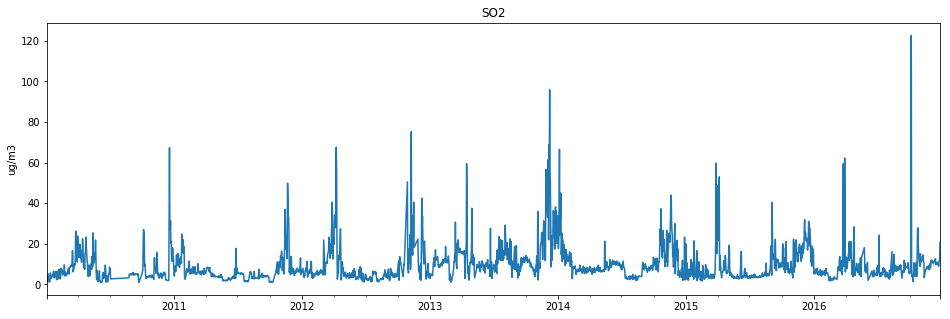

In [226]:
import matplotlib.pyplot as plt 

#area1 = data.loc[data['Location of Monitoring Station'] == 'Nizamuddin, Delhi']
data1 = data["SO2"]
data1.plot(figsize=(16,5)) 
plt.title("SO2")
plt.ylabel("ug/m3")

plt.show()

In [227]:
df = data
#df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df.index)
#df = df.set_index('index')

In [228]:
data.index = pd.to_datetime(data.index, format='%Y-%m-%d')
data.index.dtype

dtype('<M8[ns]')

In [229]:
data.describe()

,Bar_Pressure,NO2,PM10,Solar Radiation(SR),SO2,Temp
count,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000
mean,746.430267,41.141624,144.142446,575.595826,9.422691,24.745439
std,21.281864,30.659402,112.932466,119.734406,8.822011,8.435064
min,370.010000,1.210000,0.020000,13.730000,1.010000,0.010000
25%,737.840000,21.470000,42.770000,610.440000,4.240000,18.260000
50%,752.200000,34.720000,128.690000,610.440000,6.880000,26.550000
75%,758.230000,50.050000,203.270000,610.440000,11.230000,30.610000
max,766.390000,334.070000,783.270000,789.170000,122.640000,67.500000


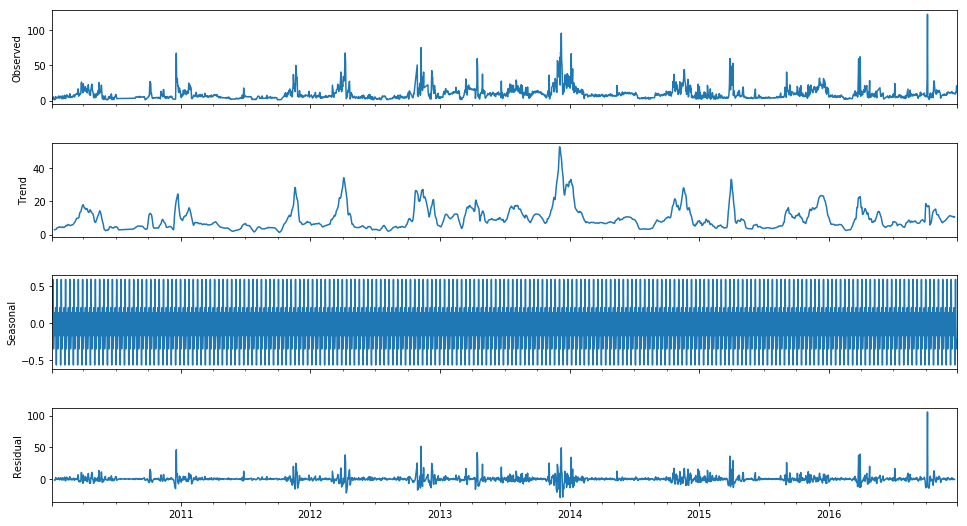

In [230]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data.SO2, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [231]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/home/ninjakx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/home/ninjakx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


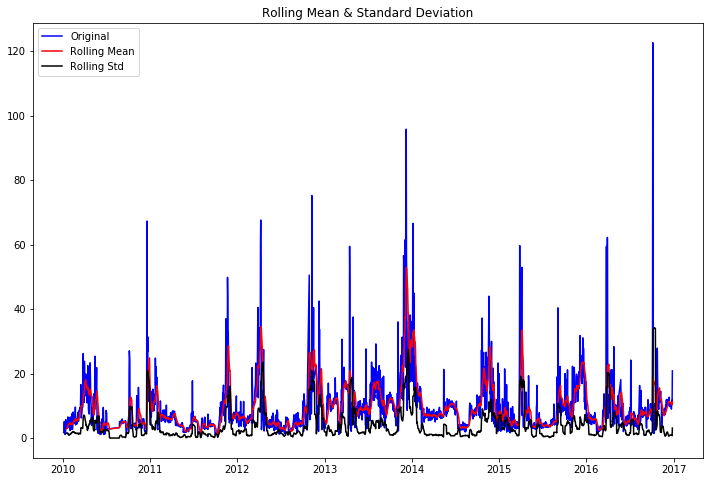

Results of Dickey-Fuller Test:
Test Statistic                -7.303063e+00
p-value                        1.323071e-10
#Lags Used                     1.000000e+01
Number of Observations Used    2.538000e+03
Critical Value (1%)           -3.432929e+00
Critical Value (5%)           -2.862679e+00
Critical Value (10%)          -2.567377e+00
dtype: float64


In [232]:
test_stationarity(data.SO2)

In [233]:
mod = sm.tsa.statespace.SARIMAX(data.SO2, trend='n', order=(0,1,0), seasonal_order=(0,1,1,12))
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                SO2   No. Observations:                 2549
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood               -8421.115
Date:                            Sat, 10 Feb 2018   AIC                          16846.230
Time:                                    21:34:10   BIC                          16857.917
Sample:                                01-04-2010   HQIC                         16850.469
                                     - 12-26-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.9987      0.036    -27.981      0.000      -1.069      -0.929
sigma2        43.7807      1.310   

In [234]:
mod = sm.tsa.statespace.SARIMAX(data.SO2, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                SO2   No. Observations:                 2549
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood               -8420.442
Date:                            Sat, 10 Feb 2018   AIC                          16846.884
Time:                                    21:34:18   BIC                          16864.414
Sample:                                01-04-2010   HQIC                         16853.242
                                     - 12-26-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0232      0.016     -1.407      0.159      -0.056       0.009
ma.S.L12      -0.9974      0.019   

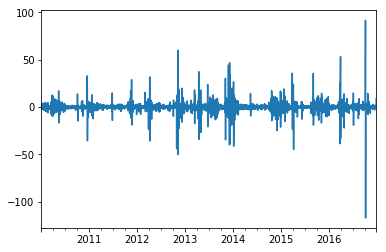

In [235]:
results.resid.plot()

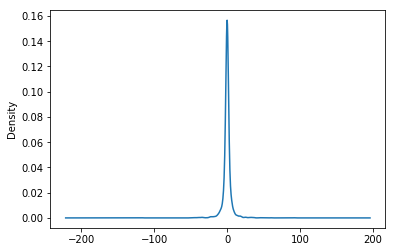

In [236]:
results.resid.plot(kind='kde')


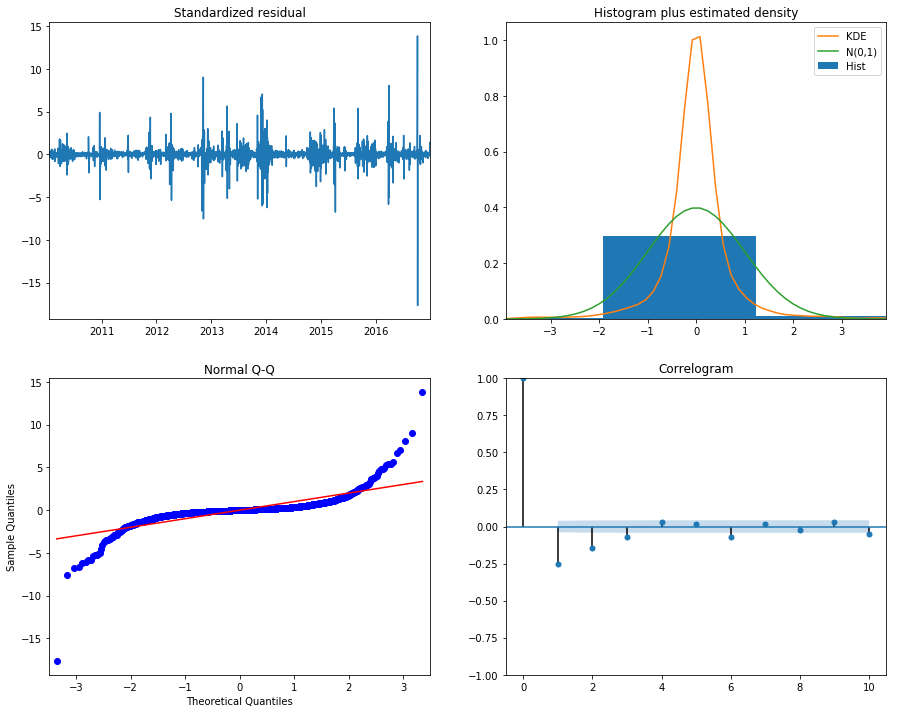

In [237]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

2189 to 2548
2016-01-02     5.822292
2016-01-03     5.642484
2016-01-04     5.757204
2016-01-05     5.402570
2016-01-06     5.968604
2016-01-07     7.618955
2016-01-08     4.547051
2016-01-09     7.063026
2016-01-10     7.300936
2016-01-11     7.093174
2016-01-12     7.520336
2016-01-13     5.166963
2016-01-14     6.448616
2016-01-15     5.720055
2016-01-16     4.903050
2016-01-17     5.173104
2016-01-18     6.343030
2016-01-19     5.437293
2016-01-20     6.553280
2016-01-21     7.717801
2016-01-22     4.909137
2016-01-23     4.840627
2016-01-24     3.723618
2016-01-25     6.085949
2016-01-26     7.062177
2016-01-27     6.139518
2016-01-28     5.243064
2016-01-29     6.126983
2016-01-30     5.806350
2016-01-31     4.917800
                ...    
2016-11-27     6.678948
2016-11-28     8.316831
2016-11-29    10.962835
2016-11-30     7.868543
2016-12-01    10.387434
2016-12-02    12.115690
2016-12-03    11.173071
2016-12-04    12.157440
2016-12-05    11.311624
2016-12-06    11.636402
201

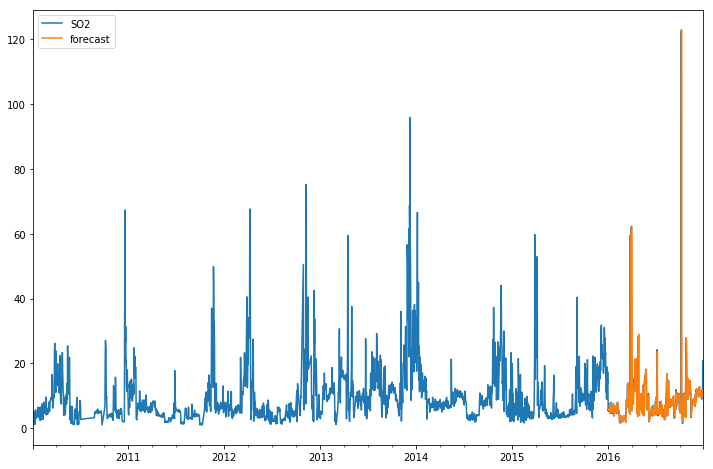

In [240]:
start = df.index.get_loc('2017-01-02')
end = df.index.get_loc('2017-12-31')
print(start,'to',end)
print(results.predict(start=start ,end=end, dynamic= False))
data['forecast'] = results.predict(start=start ,end=end, dynamic= False)  
data[['SO2','forecast']].plot(figsize=(12, 8)) 
plt.savefig('ts_df_predict.png', bbox_inches='tight')

/home/ninjakx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


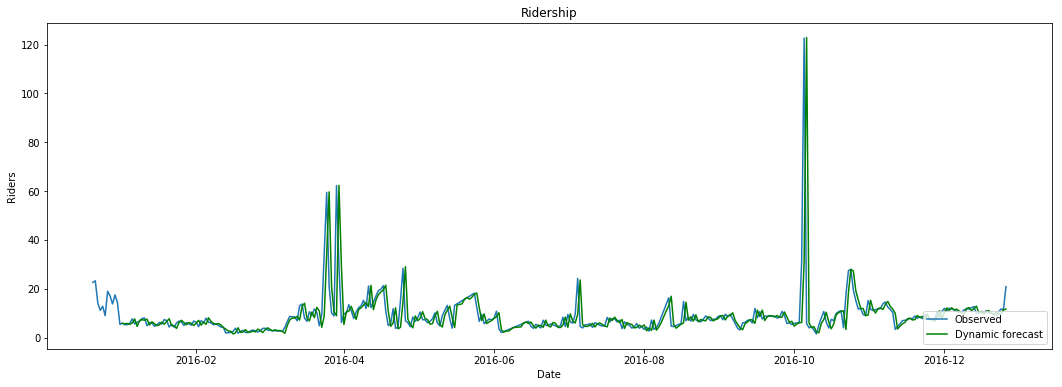

In [241]:
npredict =data.SO2['2017'].shape[0]
#print(npredict)
fig, ax = plt.subplots(figsize=(18,6))
npre = 12
ax.set(title='Ridership', xlabel='Date', ylabel='Riders')
ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'SO2'], '-', label='Observed')
ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'forecast'], 'g', label='Dynamic forecast')
legend = ax.legend(loc='lower right')
legend.get_frame().set_facecolor('w')
plt.savefig('ts_predict_compare.png', bbox_inches='tight')

In [176]:
predictions = results.predict(start=start+1, end=end+1)
#predictions


In [177]:
import numpy as np
dates = []
actual =[]
predicted = np.array(predictions, dtype=float)
for i in range(start,end+1):
    dates.append(str(data.index[i]).split(' ')[0])
    actual.append(data['SO2'].iloc[i])
df2 = pd.DataFrame({'Date':dates,'Predicted':predicted,'Actual':actual},columns=['Date','Predicted','Actual'])
df2


,Date,Predicted,Actual
0,2017-01-02,15.716738,15.140000
1,2017-01-03,14.875322,14.322857
2,2017-01-04,12.902657,13.505714
3,2017-01-05,12.296708,12.688571
4,2017-01-06,11.848285,11.871429
5,2017-01-07,11.404422,11.054286
6,2017-01-08,10.453108,10.237143
7,2017-01-09,8.840794,9.420000
8,2017-01-10,7.767663,7.350000
9,2017-01-11,9.638885,9.580000


In [344]:
data = pd.read_csv("airdata/combined.csv",sep=';')
data = pd.DataFrame(data)
#data.set_index('index', drop=True)
data = data[['index','Sulfur Dioxide(SO2)']]
data.rename(columns={ 'Sulfur Dioxide(SO2)': 'SO2','index':'Date'}, inplace=True)

data

,Date,SO2
0,01/02/2010,5.85
1,01/03/2010,5.05
2,01/04/2010,23.84
3,01/05/2010,6.36
4,01/06/2010,4.42
5,01/07/2010,8.59
6,01/08/2010,NaN
7,01/09/2010,4.90
8,01/10/2010,NaN
9,01/11/2010,3.48


In [345]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
#data['Sulfur Dioxide(SO2)']
#data.describe()
data

,Date,SO2
0,2010-02-01,5.85
1,2010-03-01,5.05
2,2010-04-01,23.84
3,2010-05-01,6.36
4,2010-06-01,4.42
5,2010-07-01,8.59
6,2010-08-01,NaN
7,2010-09-01,4.90
8,2010-10-01,NaN
9,2010-11-01,3.48


In [346]:
data.index = pd.to_datetime(data['Date'], format='%Y-%m-%d')
#data.index.dtype
data.sort_index(inplace = True)
data
#data = data.interpolate(method='linear', axis=0).ffill().bfill()


#idx = pd.date_range('2010-01-01', '2017-01-31')
#s = data.reindex(idx)
#data = s
#data

,Date,SO2
Date,,
2010-01-04,2010-01-04,1.74
2010-01-05,2010-01-05,1.99
2010-01-06,2010-01-06,4.18
2010-01-07,2010-01-07,5.20
2010-01-08,2010-01-08,2.66
2010-01-09,2010-01-09,1.42
2010-01-10,2010-01-10,1.14
2010-01-11,2010-01-11,NaN
2010-01-12,2010-01-12,1.60


In [350]:
idx = pd.date_range('2010-01-01', '2017-01-31')
#data2.index = pd.to_datetime(data.index, format='%Y-%m-%d')
#data2
s = data.reindex(idx)
data = data.interpolate(method='linear', axis=0).ffill().bfill()
#data.reset_index()
#data = data[['Date','SO2']]
#data = data.rename_axis(None)
data = data.reset_index(drop=True)
data

,Date,SO2
0,2010-01-04,1.74
1,2010-01-05,1.99
2,2010-01-06,4.18
3,2010-01-07,5.20
4,2010-01-08,2.66
5,2010-01-09,1.42
6,2010-01-10,1.14
7,2010-01-11,1.37
8,2010-01-12,1.60
9,2010-01-13,5.72


In [362]:
with open('airdata/analyze.csv', 'w') as fw:
    data.to_csv(fw, sep=';', encoding='utf-8', index=False)

In [376]:
series = pd.read_csv('airdata/analyze.csv', header=0,sep=';')
split_point = len(series) - 7
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', sep=';', encoding='utf-8', index=False)
validation.to_csv('validation.csv', sep=';', encoding='utf-8', index=False)

Dataset 2424, Validation 7


In [377]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = pd.read_csv('dataset.csv',sep=';')
series


,Date,SO2
0,2010-01-04,1.74
1,2010-01-05,1.99
2,2010-01-06,4.18
3,2010-01-07,5.20
4,2010-01-08,2.66
5,2010-01-09,1.42
6,2010-01-10,1.14
7,2010-01-11,1.37
8,2010-01-12,1.60
9,2010-01-13,5.72


In [380]:
# prepare data
X = series['SO2'].values
X = X.astype('float32')
print(X)
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# predict
	yhat = history[-1]
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

[  1.74000001   1.99000001   4.17999983 ...,  10.18999958  10.98999977
  10.13000011]
>Predicted=9.890, Expected= 10
>Predicted=9.700, Expected=  8
>Predicted=8.340, Expected=  6
>Predicted=6.090, Expected=  7
>Predicted=6.600, Expected=  8
>Predicted=8.060, Expected=  9
>Predicted=8.990, Expected= 12
>Predicted=11.910, Expected=  7
>Predicted=7.480, Expected=  5
>Predicted=5.380, Expected= 17
>Predicted=16.860, Expected= 10
>Predicted=9.980, Expected= 10
>Predicted=10.410, Expected= 17
>Predicted=17.260, Expected= 14
>Predicted=14.250, Expected= 24
>Predicted=23.590, Expected= 12
>Predicted=12.160, Expected= 18
>Predicted=18.040, Expected= 13
>Predicted=13.330, Expected= 21
>Predicted=21.180, Expected= 22
>Predicted=22.040, Expected= 12
>Predicted=11.750, Expected= 17
>Predicted=17.300, Expected= 15
>Predicted=14.580, Expected= 17
>Predicted=16.610, Expected= 22
>Predicted=21.610, Expected= 12
>Predicted=11.740, Expected= 13
>Predicted=13.260, Expected= 13
>Predicted=12.990, Expected=

In [383]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
# load data
series = pd.read_csv('dataset.csv',header=0,sep=';')
#print(series)
# prepare data
X = series['SO2'].values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# predict
	model = ARIMA(history, order=(0,1,2))
	model_fit = model.fit(disp=0)
	yhat = model_fit.forecast()[0]
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=9.138, Expected= 10
>Predicted=8.862, Expected=  8
>Predicted=8.356, Expected=  6
>Predicted=7.037, Expected=  7
>Predicted=7.441, Expected=  8
>Predicted=7.982, Expected=  9
>Predicted=8.458, Expected= 12
>Predicted=10.415, Expected=  7
>Predicted=7.456, Expected=  5
>Predicted=6.993, Expected= 17
>Predicted=14.074, Expected= 10
>Predicted=8.416, Expected= 10
>Predicted=10.959, Expected= 17
>Predicted=14.477, Expected= 14
>Predicted=12.428, Expected= 24
>Predicted=19.812, Expected= 12
>Predicted=11.474, Expected= 18
>Predicted=18.030, Expected= 13
>Predicted=13.056, Expected= 21
>Predicted=19.712, Expected= 22
>Predicted=18.854, Expected= 12
>Predicted=13.566, Expected= 17
>Predicted=18.090, Expected= 15
>Predicted=14.729, Expected= 17
>Predicted=16.992, Expected= 22
>Predicted=19.435, Expected= 12
>Predicted=13.107, Expected= 13
>Predicted=15.493, Expected= 13
>Predicted=13.841, Expected= 13
>Predicted=13.794, Expected= 17
>Predicted=16.013, Expected= 14
>Predicted=14.169,

>Predicted=7.161, Expected=  7
>Predicted=7.061, Expected=  8
>Predicted=7.391, Expected=  6
>Predicted=6.242, Expected=  7
>Predicted=6.970, Expected=  8
>Predicted=7.627, Expected=  6
>Predicted=6.309, Expected=  7
>Predicted=6.862, Expected=  7
>Predicted=7.034, Expected=  7
>Predicted=6.785, Expected=  7
>Predicted=7.010, Expected=  8
>Predicted=7.771, Expected=  8
>Predicted=7.720, Expected=  9
>Predicted=8.323, Expected=  7
>Predicted=7.046, Expected=  6
>Predicted=6.984, Expected=  7
>Predicted=7.021, Expected=  8
>Predicted=7.435, Expected=  6
>Predicted=6.673, Expected=  5
>Predicted=5.949, Expected=  6
>Predicted=6.537, Expected=  6
>Predicted=5.947, Expected=  8
>Predicted=7.310, Expected=  7
>Predicted=6.831, Expected=  6
>Predicted=6.355, Expected=  7
>Predicted=6.843, Expected=  8
>Predicted=7.538, Expected=  6
>Predicted=6.252, Expected=  6
>Predicted=6.678, Expected=  7
>Predicted=6.709, Expected=  7
>Predicted=6.874, Expected=  7
>Predicted=6.928, Expected=  8
>Predict

>Predicted=6.002, Expected=  5
>Predicted=6.183, Expected=  6
>Predicted=6.229, Expected=  5
>Predicted=5.634, Expected=  5
>Predicted=5.433, Expected=  8
>Predicted=6.856, Expected=  4
>Predicted=4.418, Expected=  7
>Predicted=6.891, Expected= 12
>Predicted=9.223, Expected=  2
>Predicted=3.905, Expected=  3
>Predicted=4.770, Expected=  3
>Predicted=3.887, Expected=  3
>Predicted=3.757, Expected=  6
>Predicted=5.251, Expected= 23
>Predicted=15.378, Expected=  2
>Predicted=3.696, Expected=  5
>Predicted=7.488, Expected=  6
>Predicted=6.313, Expected= 20
>Predicted=14.594, Expected= 13
>Predicted=10.679, Expected=  3
>Predicted=6.384, Expected= 11
>Predicted=10.593, Expected=  3
>Predicted=5.307, Expected=  2
>Predicted=5.216, Expected=  7
>Predicted=6.817, Expected=  2
>Predicted=3.771, Expected=  4
>Predicted=5.103, Expected=  8
>Predicted=6.457, Expected=  7
>Predicted=6.323, Expected=  7
>Predicted=6.403, Expected=  4
>Predicted=4.877, Expected=  5
>Predicted=5.361, Expected= 12
>Pre

>Predicted=12.849, Expected=  9
>Predicted=11.945, Expected=  7
>Predicted=9.813, Expected= 12
>Predicted=12.566, Expected= 12
>Predicted=11.519, Expected= 11
>Predicted=11.560, Expected= 12
>Predicted=12.082, Expected= 12
>Predicted=11.657, Expected= 11
>Predicted=11.401, Expected=  8
>Predicted=9.613, Expected=  8
>Predicted=9.609, Expected=  9
>Predicted=9.822, Expected= 11
>Predicted=10.306, Expected= 10
>Predicted=10.238, Expected=  9
>Predicted=9.226, Expected= 10
>Predicted=10.172, Expected=  9
>Predicted=9.449, Expected=  9
>Predicted=9.192, Expected= 11
>Predicted=10.386, Expected= 11
>Predicted=10.268, Expected= 20
>Predicted=15.906, Expected= 19
>Predicted=15.348, Expected= 10
>Predicted=11.652, Expected=  7
>Predicted=10.254, Expected= 12
>Predicted=12.249, Expected= 13
>Predicted=12.366, Expected=  8
>Predicted=9.788, Expected=  6
>Predicted=8.415, Expected= 18
>Predicted=15.047, Expected= 11
>Predicted=10.369, Expected= 21
>Predicted=17.670, Expected=  7
>Predicted=9.180,

>Predicted=5.098, Expected=  8
>Predicted=6.903, Expected=  4
>Predicted=4.770, Expected=  9
>Predicted=7.982, Expected=  6
>Predicted=6.024, Expected=  6
>Predicted=6.303, Expected= 10
>Predicted=8.282, Expected= 24
>Predicted=16.533, Expected=  5
>Predicted=6.009, Expected=  4
>Predicted=7.627, Expected=  5
>Predicted=6.761, Expected=  5
>Predicted=6.492, Expected=  6
>Predicted=6.379, Expected=  4
>Predicted=5.315, Expected=  6
>Predicted=6.252, Expected=  6
>Predicted=5.747, Expected=  5
>Predicted=5.464, Expected=  5
>Predicted=5.225, Expected=  5
>Predicted=5.192, Expected=  8
>Predicted=7.003, Expected=  6
>Predicted=5.916, Expected=  8
>Predicted=7.133, Expected=  8
>Predicted=7.005, Expected=  6
>Predicted=6.548, Expected=  7
>Predicted=7.022, Expected=  4
>Predicted=4.983, Expected=  6
>Predicted=6.590, Expected=  5
>Predicted=5.540, Expected=  5
>Predicted=5.571, Expected=  4
>Predicted=4.714, Expected=  4
>Predicted=4.927, Expected=  6
>Predicted=5.477, Expected=  4
>Predic

In [ ]:
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
 
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
# load dataset
series = pd.read_csv('dataset.csv',header=0,sep=';')
# evaluate parameters
p_values = range(0,13)
d_values = range(0, 4)
q_values = range(0, 13)
warnings.filterwarnings("ignore")
evaluate_models(series['SO2'].values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=9.899
ARIMA(0, 0, 1) MSE=8.286
ARIMA(0, 0, 2) MSE=7.782
ARIMA(0, 0, 3) MSE=7.730
ARIMA(0, 0, 4) MSE=7.555
ARIMA(0, 0, 5) MSE=7.388
ARIMA(0, 0, 6) MSE=7.344
ARIMA(0, 0, 7) MSE=7.344
ARIMA(0, 1, 0) MSE=7.976
ARIMA(0, 1, 1) MSE=7.261
ARIMA(0, 1, 2) MSE=7.062
ARIMA(0, 1, 3) MSE=7.060
ARIMA(0, 2, 0) MSE=12.972
ARIMA(0, 2, 1) MSE=7.981
ARIMA(1, 0, 0) MSE=7.353
ARIMA(1, 0, 1) MSE=7.180
ARIMA(1, 0, 2) MSE=7.030
ARIMA(1, 0, 3) MSE=7.029
ARIMA(1, 0, 4) MSE=7.057
ARIMA(1, 1, 0) MSE=7.639
ARIMA(1, 1, 1) MSE=7.068
ARIMA(1, 1, 2) MSE=7.079
ARIMA(1, 1, 3) MSE=7.078
ARIMA(1, 1, 4) MSE=7.106


In [ ]:
'''
ARIMA(0, 0, 0) MSE=9.899
ARIMA(0, 0, 1) MSE=8.286
ARIMA(0, 0, 2) MSE=7.782
ARIMA(0, 0, 3) MSE=7.730
ARIMA(0, 0, 4) MSE=7.555
ARIMA(0, 0, 5) MSE=7.388
ARIMA(0, 0, 6) MSE=7.344
ARIMA(0, 0, 7) MSE=7.344
ARIMA(0, 1, 0) MSE=7.976
ARIMA(0, 1, 1) MSE=7.261
ARIMA(0, 1, 2) MSE=7.062
ARIMA(0, 1, 3) MSE=7.060
ARIMA(0, 2, 0) MSE=12.972
ARIMA(0, 2, 1) MSE=7.981
ARIMA(1, 0, 0) MSE=7.353
ARIMA(1, 0, 1) MSE=7.180
ARIMA(1, 0, 2) MSE=7.030
ARIMA(1, 0, 3) MSE=7.029
ARIMA(1, 0, 4) MSE=7.057
ARIMA(1, 1, 0) MSE=7.639
ARIMA(1, 1, 1) MSE=7.068
ARIMA(1, 1, 2) MSE=7.079
ARIMA(1, 1, 3) MSE=7.078
ARIMA(1, 1, 4) MSE=7.106
'''

In [242]:
import pandas as pd 
times = pd.date_range('2017-01-01', periods=7, freq='1d')


In [243]:
future = pd.DataFrame(index=times, columns= data.columns)
df = pd.concat([data, future])


In [246]:
df

,Bar_Pressure,NO2,PM10,PM2.5,Solar Radiation(SR),SO2,Temp,Date,forecast
2010-01-04,650.28,3.26,48.95,82.51,610.44,1.74,10.65,2010-01-04,NaN
2010-01-05,648.86,5.30,57.12,82.51,610.44,1.99,10.74,2010-01-05,NaN
2010-01-06,645.97,10.39,113.11,82.51,610.44,4.18,11.21,2010-01-06,NaN
2010-01-07,646.22,8.55,124.22,82.51,610.44,5.20,10.78,2010-01-07,NaN
2010-01-08,647.40,4.23,66.37,82.51,610.44,2.66,9.04,2010-01-08,NaN
2010-01-09,648.90,1.21,51.65,82.51,610.44,1.42,10.55,2010-01-09,NaN
2010-01-10,647.32,2.29,53.37,82.51,610.44,1.14,7.64,2010-01-10,NaN
2010-01-11,647.28,2.26,58.41,82.51,610.44,1.37,7.85,2010-01-11,NaN
2010-01-12,646.94,8.62,105.51,82.51,610.44,1.60,8.29,2010-01-12,NaN
2010-01-13,647.35,10.17,137.98,82.51,610.44,5.72,10.03,2010-01-13,NaN


In [251]:
start = 2490
end = 2600
print(start,end)

#predictions = results.predict(start=start, end=end)
#df['forecast(NEW)'] = results.predict(start = start, end = end, dynamic= True)  
print(results.predict(start = start, end = end, dynamic= False))
#print(df['forecast(NEW)'])
#df['forecast(NEW)'].ix[-24:].plot(figsize=(12, 8)) 
#plt.savefig('ts_predict_future.png', bbox_inches='tight')

2490 2600
2016-10-29    11.898373
2016-10-30     8.974669
2016-10-31     9.226000
2016-11-01    15.253319
2016-11-02    11.648376
2016-11-03    10.049788
2016-11-04    11.852959
2016-11-05    12.145377
2016-11-06    11.477984
2016-11-07    13.538809
2016-11-08    14.803337
2016-11-09    12.739443
2016-11-10    11.696973
2016-11-11     9.912512
2016-11-12     3.520527
2016-11-13     4.716240
2016-11-14     5.625720
2016-11-15     6.268187
2016-11-16     7.691748
2016-11-17     7.897854
2016-11-18     7.208241
2016-11-19     7.337856
2016-11-20     9.019883
2016-11-21     8.246193
2016-11-22     8.634132
2016-11-23     7.518142
2016-11-24     9.561912
2016-11-25     7.761618
2016-11-26     7.261547
2016-11-27     6.678948
                ...    
2017-01-18    20.615532
2017-01-19    20.797241
2017-01-20    21.083341
2017-01-21    21.195818
2017-01-22    20.823411
2017-01-23    21.133843
2017-01-24    21.221290
2017-01-25    21.105606
2017-01-26    20.477601
2017-01-27    21.079151
2017-0

In [182]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy

 
def predict(coef, history):
	yhat = 0.0
	for i in range(1, len(coef)+1):
		yhat += coef[i-1] * history[-i]
	return yhat
 
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)
 
series = data['SO2']
X = series.values
size = len(X) - 100
#print(size)
#print(data.index[size])
#print(data.SO2[size])
#print("size:",size)
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit(trend='nc', disp=False)
	ar_coef, ma_coef = model_fit.arparams, model_fit.maparams
	resid = model_fit.resid
	diff = difference(history)
	yhat = history[-1] + predict(ar_coef, diff) + predict(ma_coef, resid)
	predictions.append(yhat)
	obs = test[t]
	#print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 7.922


In [183]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
forecast = model_fit.forecast()[0]
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, size)
print('Forecast: %f' % forecast)

Forecast: 20.617501


In [163]:
data['SO2'][2408]

8.5175000000000001

In [185]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load dataset
series = data['SO2']
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(1,1,1))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=19)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

Day 1: 19.652307
Day 2: 18.478288
Day 3: 17.497480
Day 4: 16.604781
Day 5: 15.752263
Day 6: 14.918069
Day 7: 14.092232
Day 8: 13.270204
Day 9: 12.449915
Day 10: 10.377561
Day 11: 12.605569
Day 12: 11.153741
Day 13: 11.341988
Day 14: 11.870270
Day 15: 10.468567
Day 16: 7.846872
Day 17: 9.605179
Day 18: 8.913488
Day 19: 13.931798


In [ ]:
data.rename(columns={'Nitrogen Dioxide(NO2)': 'NO2', 'Bar Pressure(Bar Pressure)': 'Bar_Pressure','PM 10(RSPM)': 'PM10','Temperature(TEMP)': 'Temp','Sulfur Dioxide(SO2)': 'SO2','PM 2.5(PM2.5)':'PM2.5','Solar_Radiation(SR)':'Solar_Radiation'}, inplace=True)
#data

In [ ]:
data = pd.DataFrame(data) 

In [ ]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import numpy
 
# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)
 
# Make a prediction give regression coefficients and lag obs
def predict(coef, history):
	yhat = coef[0]
	for i in range(1, len(coef)):
		yhat += coef[i] * history[-i]
	return yhat
 
series = data['SO2']
# split dataset
X = difference(series.values)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
# train autoregression


model = AR(train)
model_fit = model.fit(maxlag=6, disp=False)
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
	yhat = predict(coef, history)
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
# fit an AR model and save the whole model to file
from pandas import Series
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import ARResults
import numpy
 
# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)
 
# load dataset
series = data['SO2']
X = difference(series.values)
# fit model
model = AR(X)
model_fit = model.fit(maxlag=6, disp=False)
# save model to file
model_fit.save('ar_model.pkl')
# save the differenced dataset
numpy.save('ar_data.npy', X)
# save the last ob
numpy.save('ar_obs.npy', [series.values[-1]])

In [ ]:
# load the AR model from file
from statsmodels.tsa.ar_model import ARResults
import numpy
loaded = ARResults.load('ar_model.pkl')
print(loaded.params)
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
print(last_ob)

# load the AR model from file
from statsmodels.tsa.ar_model import ARResults
import numpy
loaded = ARResults.load('ar_model.pkl')
print(loaded.params)
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
print(last_ob)

In [ ]:
data['Sampling Date'].head

In [ ]:
data['Sampling Date'] = pd.to_datetime(data['Sampling Date'],format = '%d-%m-%y')


In [ ]:
data.index = data['Sampling Date']
del data['Sampling Date']
data.describe()

In [ ]:
#data['PM 2.5'].fillna((data['PM 2.5'].mean()), inplace=True)
area1 = data.loc[data['Location of Monitoring Station'] == 'Nizamuddin, Delhi']
data1 = area1["NO2"]
data1.plot(figsize=(16,5)) 
plt.title("Nizamuddin, Delhi")
plt.ylabel("ug/m3")

plt.show()


In [ ]:
# The 'MS' string groups the data in buckets by start of the month
data = data1.resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
data = data.fillna(data.bfill())

In [ ]:
# fit an AR model and manually save coefficients to file
from pandas import Series
from statsmodels.tsa.ar_model import AR
import numpy
 
# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)
 
# load dataset
series = data1
X = difference(series.values)
# fit model
window_size = 6
model = AR(X)
model_fit = model.fit(maxlag=window_size, disp=False)
# save coefficients
coef = model_fit.params
numpy.save('man_model.npy', coef)
# save lag
lag = X[-window_size:]
numpy.save('man_data.npy', lag)
# save the last ob
numpy.save('man_obs.npy', [series.values[-1]])

In [ ]:
# load the manually saved model from file
import numpy
coef = numpy.load('man_model.npy')
print(coef)
lag = numpy.load('man_data.npy')
print(lag)
last_ob = numpy.load('man_obs.npy')
print(last_ob)

In [ ]:
# load AR model from file and make a one-step prediction
from statsmodels.tsa.ar_model import ARResults
import numpy
# load model
model = ARResults.load('ar_model.pkl')
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
# make prediction
predictions = model.predict(start=len(data)-100, end=len(data))
# transform prediction
yhat = predictions[0] + last_ob[0]
print(len(data)-100,'to',len(data))
print('Prediction: %f' % yhat)

In [ ]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy

 
def predict(coef, history):
	yhat = 0.0
	for i in range(1, len(coef)+1):
		yhat += coef[i-1] * history[-i]
	return yhat
 
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)
 
series = data['SO2']
X = series.values
size = len(X) - 100
#print(size)
print(data.index[size])
print(data.SO2[size])
print("size:",size)
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit(trend='nc', disp=False)
	ar_coef, ma_coef = model_fit.arparams, model_fit.maparams
	resid = model_fit.resid
	diff = difference(history)
	yhat = history[-1] + predict(ar_coef, diff) + predict(ma_coef, resid)
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

In [ ]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
forecast = model_fit.forecast()[0]
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, size)
print('Forecast: %f' % forecast)

In [ ]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy

forecast = model_fit.forecast(steps=7)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

In [ ]:
forecast = model_fit.forecast(steps=7)[0]
forecast = inverse_difference(X, forecast, size)
print('Forecast: %f' % forecast)

In [ ]:
from pandas import datetime
start = len(data)-100
end = len(data)
forecast = model_fit.predict(start=start, end=end)
#forecast = inverse_difference(X, forecast, size)


In [ ]:
for yhat in forecast:
	inverted = inverse_difference(history, yhat, len(data))
	print('Day %d: %f' % (start, inverted))
	history.append(inverted)
	start+=1

print(forecast)

In [ ]:
for i in range(start,end+1):
    #print(forecast[i-(len(data)+1)])
    #print(str(data.index[i-(len(data)+1)]).split(' ')[0])
    
    #print('Forecast: {}'.format(forecast[i-(len(data)+1)]))

In [ ]:
area1 = data.loc[data['Location of Monitoring Station'] == 'Nizamuddin, Delhi']

In [ ]:
area1 = data1
area1.head

In [ ]:
y = area1
# The 'MS' string groups the data in buckets by start of the month
#y = y['PM 10(RSPM)'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

In [ ]:
ts = area1
ts.head(10)


In [ ]:
plt.plot(ts)

In [ ]:
area2 = data.loc[data['Location of Monitoring Station'] == 'Pritampura, Delhi']

In [ ]:
ts2 = area2['RSPM/PM10'] 
plt.plot(ts2)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
test_stationarity(ts)

In [ ]:
ts_log = np.log(ts)
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [ ]:
import tweepy
import pandas as pd
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import collections
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import re, string
import nltk
from nltk.collocations import *
from nltk.stem.wordnet import WordNetLemmatizer
import string
from gensim.models import Word2Vec
from textblob import TextBlob
from gensim import corpora, models
import string



In [ ]:
words_list = []
stop = stopwords
#stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized
texts = [["places","eat"],["places","visit"]]
doc_clean = [clean(doc).split() for doc in texts]
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
ldamodel = models.ldamodel.LdaModel(doc_term_matrix, num_topics=6, id2word = 
dictionary, passes=5)
for topic in ldamodel.show_topics(num_topics=6, formatted=False, num_words=15):
    for (w,val) in topic[1]:
        words_list.append(w)
    
    #print(list(w for (w, val) in topic[1]))
    print("Topic {}: Words: ".format(topic[0]))
    topicwords = [w for (w, val) in topic[1]]
    print(topicwords)
#print(words_list)

In [ ]:
Total - Employment income
Without employment income
With employment income
Percentage with employment income
Under $5,000 (including loss)
$5,000 to $9,999
$10,000 to $19,999
$20,000 to $29,999
$30,000 to $39,999
$40,000 to $49,999
$50,000 to $59,999
$60,000 to $69,999
$70,000 to $79,999
$80,000 to $89,999
$90,000 to $99,999
$100,000 and over
Median employment income ($)Footnote 2
Average employment income ($)Footnote 3

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
source_code = requests.get('http://eoddata.com/stockquote/NASDAQ/GOOG.htm').text
soup = BeautifulSoup(source_code, "lxml")

table = soup.find_all('table')[7]

df = (pd.read_html(str(table)))[0]
print(df)
#df = pd.DataFrame(df)
#print(df.head(2))



In [ ]:
df.columns = df.iloc[0]
df = df[1:] 
df

In [ ]:
print(df.iloc[1])

In [ ]:
df['Date'][1]

In [ ]:
import numpy as np
import pandas as pd  
import urllib.request
from bs4 import BeautifulSoup

url = "http://www12.statcan.gc.ca/census-recensement/2016/dp-pd/dt-td/Rp-eng.cfm?TABID=2&LANG=E&A=R&APATH=3&DETAIL=0&DIM=0&FL=A&FREE=0&GC=01&GL=-1&GID=1341679&GK=1&GRP=1&O=D&PID=110719&PRID=10&PTYPE=109445&S=0&SHOWALL=0&SUB=0&Temporal=2017&THEME=125&VID=0&VNAMEE=&VNAMEF=&D1=0&D2=0&D3=0&D4=0&D5=0&D6=0"
res = urllib.request.urlopen(url)

html = res.read()

## parse with BeautifulSoup
bs = BeautifulSoup(html, "html.parser")

tables = bs.find_all("table")

    
df = (pd.read_html(str(tables)))[0]
print(df)



In [ ]:
table = tables[0]
lab = []
labels = table.findAll('th',{'headers':'col-0'})
for label in labels:

    data = str(label.text).strip()
    data = str(data).split("($)Footnote", 1)[0]

    lab.append(data)

In [ ]:
lab1=[]
import codecs
for i in lab:
    #i = i.encode('utf-8')
    lab1.append(i.encode().decode())
    print(i.encode().decode())
    

In [ ]:
columns = ['Employment income groups (18)','Total - Main mode of commuting','Car, truck or van','Driver, alone',
          '2 or more persons shared the ride to work','Driver, with 1 or more passengers',
         'Passenger, 2 or more persons in the vehicle','Sustainable transportation',
         'Public transit','Active transport','Other method']
df.columns = columns
df

In [ ]:
df['Employment income groups (18)']=lab1
df

In [ ]:
df

In [ ]:
df.index = df['Employment income groups (18)']
del df['Employment income groups (18)']

In [ ]:
df

In [ ]:
df_to_

In [ ]:
df.index['$10,000 to $19,999']

In [ ]:
for i in lab:
    print('{}'.format(i))

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
source_code = requests.get('http://eoddata.com/stockquote/NASDAQ/GOOG.htm').text
soup = BeautifulSoup(source_code, "lxml")

table = soup.find_all('table')[7]

df = (pd.read_html(str(table)))[0]
df.columns = df.iloc[0]
df = df[1:] 

In [ ]:
df.to_csv('file.csv', sep=';',index=False)


In [ ]:
df_data = pd.read_csv('file.csv', sep=';')
df_data

In [ ]:
dic = pd.Series.from_csv('file.csv').to_dict()
dic